In [16]:
# Importación de librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.cluster import DBSCAN
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('ggplot')
sns.set(style="whitegrid")
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12

In [17]:
## 1. Carga y exploración inicial de datos

print("Cargando datos eléctricos...")
electrical_data = pd.read_csv('data/electrical_data.csv', parse_dates=['measured_on'])

print("Cargando datos ambientales...")
environment_data = pd.read_csv('data/environment_data.csv', parse_dates=['measured_on'])

print("Cargando datos de irradiancia...")
irradiance_data = pd.read_csv('data/irradiance_data.csv', parse_dates=['measured_on'])

# **AQUÍ VA LA SOLUCIÓN 2 - LIMPIEZA DE DATOS**
# Limpiar y convertir fechas
def clean_datetime_column(df, col_name):
    # Convertir a datetime, colocando NaT para valores inválidos
    df[col_name] = pd.to_datetime(df[col_name], errors='coerce')
    # Eliminar filas con fechas inválidas
    df = df.dropna(subset=[col_name])
    return df

print("Limpiando datos de fechas...")
electrical_data = clean_datetime_column(electrical_data, 'measured_on')
environment_data = clean_datetime_column(environment_data, 'measured_on')
irradiance_data = clean_datetime_column(irradiance_data, 'measured_on')

# Verificar el contenido de la columna measured_on (OPCIONAL - puedes mantenerlo para diagnóstico)
print("Tipos de datos en measured_on:")
print(electrical_data['measured_on'].dtype)
print(f"Valores únicos de tipo: {electrical_data['measured_on'].apply(type).value_counts()}")

# Ver algunos valores para identificar el problema
print("\nPrimeros valores de measured_on:")
print(electrical_data['measured_on'].head(10))

# Mostrar información básica de los datasets
print("\nInformación del dataset de datos eléctricos:")
print(f"- Dimensiones: {electrical_data.shape}")
print(f"- Columnas: {len(electrical_data.columns)}")
if len(electrical_data) > 0:
    print(f"- Rango de fechas: {electrical_data['measured_on'].min().date()} a {electrical_data['measured_on'].max().date()}")
else:
    print("- No hay datos válidos")

print("\nInformación del dataset de datos ambientales:")
print(f"- Dimensiones: {environment_data.shape}")
print(f"- Columnas: {environment_data.columns.tolist()}")
if len(environment_data) > 0:
    print(f"- Rango de fechas: {environment_data['measured_on'].min().date()} a {environment_data['measured_on'].max().date()}")
else:
    print("- No hay datos válidos")

print("\nInformación del dataset de datos de irradiancia:")
print(f"- Dimensiones: {irradiance_data.shape}")
print(f"- Columnas: {irradiance_data.columns.tolist()}")
if len(irradiance_data) > 0:
    print(f"- Rango de fechas: {irradiance_data['measured_on'].min().date()} a {irradiance_data['measured_on'].max().date()}")
else:
    print("- No hay datos válidos")

# Mostrar las primeras filas de cada dataset
print("\nPrimeras filas del dataset de datos eléctricos:")
display(electrical_data.head())

Cargando datos eléctricos...
Cargando datos ambientales...
Cargando datos ambientales...
Cargando datos de irradiancia...
Cargando datos de irradiancia...
Limpiando datos de fechas...
Limpiando datos de fechas...
Tipos de datos en measured_on:
datetime64[ns]
Valores únicos de tipo: measured_on
<class 'pandas._libs.tslibs.timestamps.Timestamp'>    64064
Name: count, dtype: int64

Primeros valores de measured_on:
0   2017-11-01 00:00:00
1   2017-11-01 00:05:00
2   2017-11-01 00:10:00
3   2017-11-01 00:15:00
4   2017-11-01 00:20:00
5   2017-11-01 00:25:00
6   2017-11-01 00:30:00
7   2017-11-01 00:35:00
8   2017-11-01 00:40:00
9   2017-11-01 00:45:00
Name: measured_on, dtype: datetime64[ns]

Información del dataset de datos eléctricos:
- Dimensiones: (64064, 120)
- Columnas: 120
- Rango de fechas: 2017-11-01 a 2018-06-11

Información del dataset de datos ambientales:
- Dimensiones: (206008, 4)
- Columnas: ['measured_on', 'ambient_temperature_o_149575', 'wind_speed_o_149576', 'wind_directio

,measured_on,inv_01_dc_current_inv_149579,inv_01_dc_voltage_inv_149580,inv_01_ac_current_inv_149581,inv_01_ac_voltage_inv_149582,inv_01_ac_power_inv_149583,inv_02_dc_current_inv_149584,inv_02_dc_voltage_inv_149585,inv_02_ac_current_inv_149586,inv_02_ac_voltage_inv_149587,...,inv_23_dc_current_inv_149689,inv_23_dc_voltage_inv_149690,inv_23_ac_current_inv_149691,inv_23_ac_voltage_inv_149692,inv_23_ac_power_inv_149693,inv_24_dc_current_inv_149694,inv_24_dc_voltage_inv_149695,inv_24_ac_current_inv_149696,inv_24_ac_voltage_inv_149697,inv_24_ac_power_inv_149698
0,2017-11-01 00:00:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2017-11-01 00:05:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2017-11-01 00:10:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2017-11-01 00:15:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2017-11-01 00:20:00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [18]:
print("\nPrimeras filas del dataset de datos ambientales:")
display(environment_data.head())

print("\nPrimeras filas del dataset de datos de irradiancia:")
display(irradiance_data.head())


Primeras filas del dataset de datos ambientales:


,measured_on,ambient_temperature_o_149575,wind_speed_o_149576,wind_direction_o_149577
0,2017-12-01 00:00:00,38.8,1.2,156.0
1,2017-12-01 00:15:00,38.8,1.2,156.0
2,2017-12-01 00:30:00,38.8,1.2,156.0
3,2017-12-01 00:45:00,38.8,1.2,156.0
4,2017-12-01 01:00:00,37.0,2.6,247.0



Primeras filas del dataset de datos de irradiancia:


,measured_on,poa_irradiance_o_149574
0,2017-11-01 07:10:00,0.0
1,2017-11-01 07:15:00,0.0
2,2017-11-01 07:20:00,0.0
3,2017-11-01 07:25:00,0.0
4,2017-11-01 09:00:00,267.5


In [19]:
## 2. Procesamiento del archivo electrical_data.csv

# Convertir la columna measured_on a tipo datetime
electrical_data['measured_on'] = pd.to_datetime(electrical_data['measured_on'])
environment_data['measured_on'] = pd.to_datetime(environment_data['measured_on'])
irradiance_data['measured_on'] = pd.to_datetime(irradiance_data['measured_on'])

# Función para reestructurar el dataset de formato ancho a formato largo
def wide_to_long_format(df):
    # Lista para almacenar los dataframes de cada inversor
    inverter_dfs = []
    
    # Iterar sobre los 24 inversores
    for inv_num in range(1, 25):
        # Formatear el número del inversor con ceros a la izquierda (inv_01, inv_02, etc.)
        inv_prefix = f"inv_{inv_num:02d}"
        
        # Filtrar columnas correspondientes a este inversor
        inv_cols = [col for col in df.columns if inv_prefix in col]
        
        if not inv_cols:
            continue
            
        # Seleccionar solo las columnas de este inversor y measured_on
        inv_df = df[['measured_on'] + inv_cols].copy()
        
        # Crear columna device con el número de inversor
        inv_df['device'] = inv_num
        
        # Renombrar columnas para eliminar el prefijo del inversor
        rename_dict = {}
        for col in inv_cols:
            # Intentar extraer el tipo de medición usando el patrón esperado
            try:
                if f"{inv_prefix}_" in col:
                    parts = col.split(f"{inv_prefix}_")
                    if len(parts) > 1 and '_inv_' in parts[1]:
                        measurement_type = parts[1].split('_inv_')[0]
                        rename_dict[col] = measurement_type
                    else:
                        # Si no sigue el patrón exacto, intentar inferir el tipo
                        if 'dc_current' in col:
                            rename_dict[col] = 'dc_current'
                        elif 'dc_voltage' in col:
                            rename_dict[col] = 'dc_voltage'
                        elif 'ac_current' in col:
                            rename_dict[col] = 'ac_current'
                        elif 'ac_voltage' in col:
                            rename_dict[col] = 'ac_voltage'
                        elif 'ac_power' in col:
                            rename_dict[col] = 'ac_power'
                        else:
                            # Si no se puede inferir, usar el nombre completo
                            rename_dict[col] = col
            except Exception as e:
                print(f"Error procesando columna {col}: {e}")
                # En caso de error, mantener el nombre original
                rename_dict[col] = col
            
        inv_df = inv_df.rename(columns=rename_dict)
        
        # Asegurar que las columnas numéricas sean de tipo numérico, forzando a NaN los errores
        numeric_cols = ['dc_current', 'dc_voltage', 'ac_current', 'ac_voltage', 'ac_power']
        for num_col in numeric_cols:
            if num_col in inv_df.columns:
                inv_df[num_col] = pd.to_numeric(inv_df[num_col], errors='coerce')

        # Seleccionar solo las columnas necesarias
        cols_to_keep = ['measured_on', 'device', 'dc_current', 'dc_voltage', 
                        'ac_current', 'ac_voltage', 'ac_power']
        
        # Filtrar solo las columnas que existen en el DataFrame
        existing_cols = [col for col in cols_to_keep if col in inv_df.columns]
        inv_df = inv_df[existing_cols]
        
        # Agregar a la lista
        inverter_dfs.append(inv_df)
    
    # Concatenar todos los dataframes de inversores
    long_format_df = pd.concat(inverter_dfs, ignore_index=True)
    
    return long_format_df

# Aplicar la transformación
print("Transformando datos eléctricos de formato ancho a largo...")
electrical_long = wide_to_long_format(electrical_data)

# Mostrar el resultado
print("\nPrimeras filas del dataset transformado:")
display(electrical_long.head(10))
print(electrical_long.tail())

# Verificar la estructura del dataset resultante
print(f"\nDimensiones del dataset transformado: {electrical_long.shape}")
print(f"Número de inversores únicos: {electrical_long['device'].nunique()}")
print(f"Columnas del dataset transformado: {electrical_long.columns.tolist()}")

# Verificar valores nulos
print("\nValores nulos por columna:")
print(electrical_long.isnull().sum())

Transformando datos eléctricos de formato ancho a largo...

Primeras filas del dataset transformado:

Primeras filas del dataset transformado:


,measured_on,device,dc_current,dc_voltage,ac_current,ac_voltage,ac_power
0,2017-11-01 00:00:00,1,0.0,0.0,0.0,0.0,0.0
1,2017-11-01 00:05:00,1,0.0,0.0,0.0,0.0,0.0
2,2017-11-01 00:10:00,1,0.0,0.0,0.0,0.0,0.0
3,2017-11-01 00:15:00,1,0.0,0.0,0.0,0.0,0.0
4,2017-11-01 00:20:00,1,0.0,0.0,0.0,0.0,0.0
5,2017-11-01 00:25:00,1,0.0,0.0,0.0,0.0,0.0
6,2017-11-01 00:30:00,1,0.0,0.0,0.0,0.0,0.0
7,2017-11-01 00:35:00,1,0.0,0.0,0.0,0.0,0.0
8,2017-11-01 00:40:00,1,0.0,0.0,0.0,0.0,0.0
9,2017-11-01 00:45:00,1,0.0,0.0,0.0,0.0,0.0


                measured_on  device  dc_current  dc_voltage  ac_current  \
1537531 2018-06-11 11:15:00      24         0.0         0.0         0.0   
1537532 2018-06-11 11:20:00      24         0.0         0.0         0.0   
1537533 2018-06-11 11:25:00      24         0.0         0.0         0.0   
1537534 2018-06-11 11:30:00      24         0.0         0.0         0.0   
1537535 2018-06-11 11:35:00      24         0.0         0.0         0.0   

         ac_voltage  ac_power  
1537531         0.0       0.0  
1537532         0.0       0.0  
1537533         0.0       0.0  
1537534         0.0       0.0  
1537535         NaN       NaN  

Dimensiones del dataset transformado: (1537536, 7)
Número de inversores únicos: 24
Columnas del dataset transformado: ['measured_on', 'device', 'dc_current', 'dc_voltage', 'ac_current', 'ac_voltage', 'ac_power']

Valores nulos por columna:
measured_on        0
device             0
dc_current         0
dc_voltage     64064
ac_current         0
ac_voltage 

In [20]:
## 3. Unificación de datasets

# Fusionar los tres datasets utilizando la columna measured_on
print("Fusionando datasets...")

# Primero fusionamos electrical_long con environment_data
merged_df = pd.merge(
    electrical_long,
    environment_data,
    on='measured_on',
    how='left'
)

# Luego fusionamos con irradiance_data
merged_df = pd.merge(
    merged_df,
    irradiance_data,
    on='measured_on',
    how='left'
)

# Verificar el resultado de la fusión
print("\nPrimeras filas del dataset unificado:")
display(merged_df.head())

# Información sobre el dataset unificado
print(f"\nDimensiones del dataset unificado: {merged_df.shape}")
print(f"Columnas del dataset unificado: {merged_df.columns.tolist()}")

# Verificar valores nulos después de la fusión
print("\nValores nulos por columna después de la fusión:")
print(merged_df.isnull().sum())

# Eliminar filas con valores nulos si es necesario
if merged_df.isnull().sum().sum() > 0:
    print("\nEliminando filas con valores nulos...")
    merged_df = merged_df.dropna()
    print(f"Dimensiones después de eliminar valores nulos: {merged_df.shape}")

# Resumen estadístico del dataset unificado
print("\nResumen estadístico del dataset unificado:")
display(merged_df.describe())

Fusionando datasets...

Primeras filas del dataset unificado:

Primeras filas del dataset unificado:


,measured_on,device,dc_current,dc_voltage,ac_current,ac_voltage,ac_power,ambient_temperature_o_149575,wind_speed_o_149576,wind_direction_o_149577,poa_irradiance_o_149574
0,2017-11-01 00:00:00,1,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
1,2017-11-01 00:05:00,1,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,2017-11-01 00:10:00,1,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
3,2017-11-01 00:15:00,1,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
4,2017-11-01 00:20:00,1,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN



Dimensiones del dataset unificado: (1537536, 11)
Columnas del dataset unificado: ['measured_on', 'device', 'dc_current', 'dc_voltage', 'ac_current', 'ac_voltage', 'ac_power', 'ambient_temperature_o_149575', 'wind_speed_o_149576', 'wind_direction_o_149577', 'poa_irradiance_o_149574']

Valores nulos por columna después de la fusión:
measured_on                           0
device                                0
dc_current                            0
dc_voltage                        64064
ac_current                            0
ac_voltage                            1
ac_power                              1
ambient_temperature_o_149575    1094808
wind_speed_o_149576             1094136
wind_direction_o_149577         1094136
poa_irradiance_o_149574          604104
dtype: int64

Eliminando filas con valores nulos...
Dimensiones después de eliminar valores nulos: (290812, 11)

Resumen estadístico del dataset unificado:


,measured_on,device,dc_current,dc_voltage,ac_current,ac_voltage,ac_power,ambient_temperature_o_149575,wind_speed_o_149576,wind_direction_o_149577,poa_irradiance_o_149574
count,290812,290812.000000,290812.000000,290812.000000,290812.000000,290812.000000,290812.000000,290812.000000,290812.000000,290812.000000,290812.000000
mean,2018-03-27 15:23:38.831066112,12.826087,8.900923,310.115137,7.005600,131.749797,5.975673,57.338152,5.980892,190.983391,235.187891
min,2017-12-01 00:15:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.700000,1.000000,0.000000,0.000000
25%,2018-02-18 23:41:15,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,47.600000,3.100000,128.000000,0.000000
50%,2018-03-24 08:07:30,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,56.800000,4.600000,178.000000,2.000000
75%,2018-05-09 13:18:45,19.000000,12.961000,687.770000,10.661000,287.051000,9.042000,66.300000,8.100000,275.250000,423.900000
max,2018-06-11 11:30:00,24.000000,52.837000,916.320000,36.053000,311.450000,30.089000,95.700000,27.800000,360.000000,1373.300000
std,NaN,6.888264,14.659648,342.557501,11.296332,143.727019,9.790897,13.699211,4.046537,101.990974,341.292042


Extrayendo características temporales...

Calculando eficiencia de conversión...
Calculando estabilidad DC...
Analizando impacto ambiental sobre la corriente DC...

Matriz de correlación entre variables ambientales y corriente DC:
Analizando impacto ambiental sobre la corriente DC...

Matriz de correlación entre variables ambientales y corriente DC:


,dc_current,ambient_temperature_o_149575,poa_irradiance_o_149574,wind_speed_o_149576
dc_current,1.000000,0.537427,0.848942,0.172147
ambient_temperature_o_149575,0.537427,1.000000,0.557781,0.207511
poa_irradiance_o_149574,0.848942,0.557781,1.000000,0.248308
wind_speed_o_149576,0.172147,0.207511,0.248308,1.000000


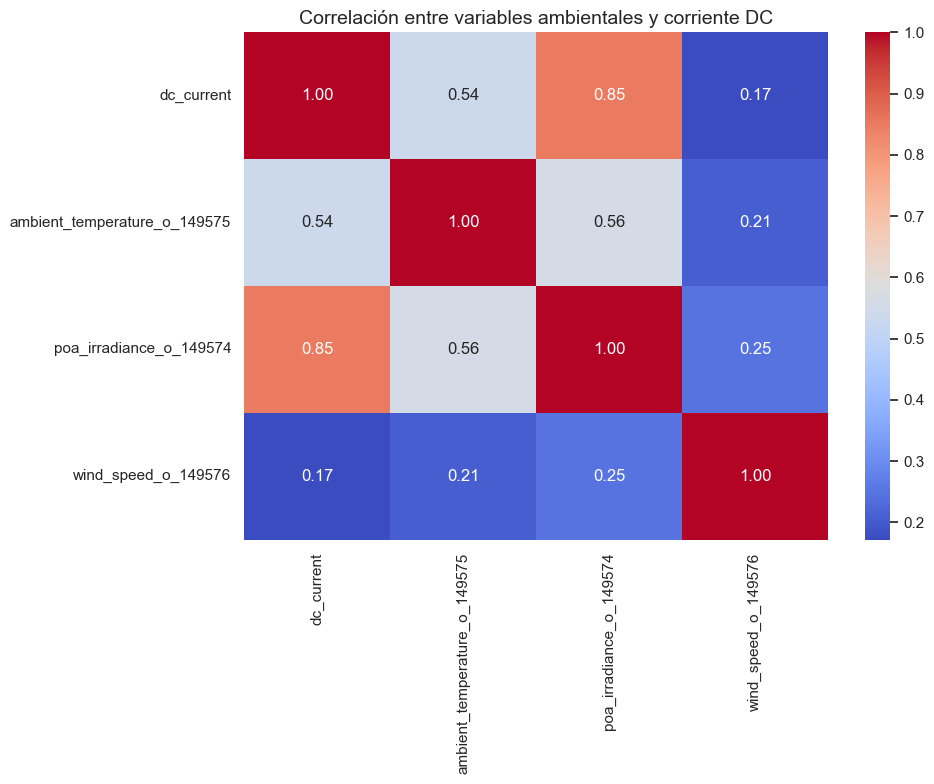


Primeras filas del dataset con características derivadas:


,measured_on,device,dc_current,dc_voltage,ac_current,ac_voltage,ac_power,ambient_temperature_o_149575,wind_speed_o_149576,wind_direction_o_149577,poa_irradiance_o_149574,hour,day,month,year,dayofweek,efficiency,stability_dc_voltage,stability_dc_current,env_impact
0,2017-12-01 00:15:00,1,0.0,0.0,0.0,0.0,0.0,38.8,1.2,156.0,0.0,0,1,12,2017,4,0.0,-0.062362,-0.597243,-0.871172
1,2017-12-01 01:00:00,1,0.0,0.0,0.0,0.0,0.0,37.0,2.6,247.0,0.0,1,1,12,2017,4,0.0,-0.062362,-0.597243,-0.862853
2,2017-12-01 01:30:00,1,0.0,0.0,0.0,0.0,0.0,37.0,2.6,247.0,0.0,1,1,12,2017,4,0.0,-0.062362,-0.597243,-0.862853
3,2017-12-01 01:45:00,1,0.0,0.0,0.0,0.0,0.0,37.0,2.6,247.0,0.0,1,1,12,2017,4,0.0,-0.062362,-0.597243,-0.862853
4,2017-12-01 02:00:00,1,0.0,0.0,0.0,0.0,0.0,37.5,1.9,265.0,0.0,2,1,12,2017,4,0.0,-0.062362,-0.597243,-0.872853



Resumen estadístico de las características derivadas:


,efficiency,stability_dc_voltage,stability_dc_current,env_impact
count,290812.000000,290812.000000,290812.000000,2.908120e+05
mean,0.000385,-0.107476,-0.649063,-2.189202e-17
std,0.000469,0.073980,0.099181,8.597934e-01
min,0.000000,-0.365474,-0.916558,-1.042843e+00
25%,0.000000,-0.151516,-0.704944,-6.306596e-01
50%,0.000000,-0.090146,-0.624933,-3.791569e-01
75%,0.000973,-0.054986,-0.570624,5.508020e-01
max,0.009056,-0.023686,-0.542213,2.593900e+00


In [21]:
## 4. Ingeniería de características

# Extraer características temporales
print("Extrayendo características temporales...")
merged_df['hour'] = merged_df['measured_on'].dt.hour
merged_df['day'] = merged_df['measured_on'].dt.day
merged_df['month'] = merged_df['measured_on'].dt.month
merged_df['year'] = merged_df['measured_on'].dt.year
merged_df['dayofweek'] = merged_df['measured_on'].dt.dayofweek

# 1. Calcular la eficiencia de conversión
print("\nCalculando eficiencia de conversión...")
# Evitar divisiones por cero
mask = (merged_df['dc_current'] > 0) & (merged_df['dc_voltage'] > 0)
merged_df['efficiency'] = 0.0  # Valor predeterminado

# Calcular solo donde dc_current y dc_voltage son mayores que cero
merged_df.loc[mask, 'efficiency'] = (
    merged_df.loc[mask, 'ac_power'] / 
    (merged_df.loc[mask, 'dc_current'] * merged_df.loc[mask, 'dc_voltage'])
)

# Limitar la eficiencia a un máximo de 1.0 (100%)
merged_df['efficiency'] = merged_df['efficiency'].clip(upper=1.0)

# 2. Calcular la estabilidad DC
print("Calculando estabilidad DC...")

# Agrupar por device para calcular la estabilidad
stability_df = merged_df.groupby('device').agg({
    'dc_voltage': ['mean', 'std'],
    'dc_current': ['mean', 'std']
}).reset_index()

# Aplanar la estructura de columnas
stability_df.columns = ['device', 'dc_voltage_mean', 'dc_voltage_std', 'dc_current_mean', 'dc_current_std']

# Calcular la estabilidad como 1 - (std/mean)
stability_df['stability_dc_voltage'] = 1 - (stability_df['dc_voltage_std'] / stability_df['dc_voltage_mean']).fillna(0)
stability_df['stability_dc_current'] = 1 - (stability_df['dc_current_std'] / stability_df['dc_current_mean']).fillna(0)

# Fusionar la estabilidad con el dataset principal
merged_df = pd.merge(merged_df, stability_df[['device', 'stability_dc_voltage', 'stability_dc_current']], on='device', how='left')

# 3. Calcular el impacto ambiental sobre la corriente
print("Analizando impacto ambiental sobre la corriente DC...")

# Crear una copia del dataframe para análisis
env_impact_df = merged_df.copy()

# Mostrar correlaciones entre variables ambientales y dc_current
corr_matrix = env_impact_df[['dc_current', 'ambient_temperature_o_149575', 
                            'poa_irradiance_o_149574', 'wind_speed_o_149576']].corr()

print("\nMatriz de correlación entre variables ambientales y corriente DC:")
display(corr_matrix)

# Visualizar la correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlación entre variables ambientales y corriente DC')
plt.tight_layout()
plt.show()

# Crear una métrica de impacto ambiental basada en las correlaciones
# Normalizar las variables ambientales
scaler = StandardScaler()
env_vars = ['ambient_temperature_o_149575', 'poa_irradiance_o_149574', 'wind_speed_o_149576']
env_impact_df[env_vars] = scaler.fit_transform(env_impact_df[env_vars])

# Crear la métrica de impacto ambiental como una combinación ponderada
# basada en las correlaciones observadas
env_impact_df['env_impact'] = (
    env_impact_df['poa_irradiance_o_149574'] * 0.7 +  # Mayor peso a la irradiancia
    env_impact_df['ambient_temperature_o_149575'] * 0.2 +  # Peso medio a la temperatura
    env_impact_df['wind_speed_o_149576'] * 0.1  # Menor peso a la velocidad del viento
)

# Fusionar esta métrica con el dataset principal
merged_df['env_impact'] = env_impact_df['env_impact']

# Mostrar las primeras filas del dataset con las nuevas características
print("\nPrimeras filas del dataset con características derivadas:")
display(merged_df.head())

# Resumen estadístico de las nuevas características
print("\nResumen estadístico de las características derivadas:")
display(merged_df[['efficiency', 'stability_dc_voltage', 'stability_dc_current', 'env_impact']].describe())

Generando cubos OLAP...

1. Cubo OLAP: Eficiencia y estabilidad DC por device, hora y fecha

Cubo OLAP de eficiencia y estabilidad DC:

Cubo OLAP de eficiencia y estabilidad DC:


efficiency                                                         \
              max                                                          
hour           0    1    2    3    4    5         6         7         8    
device                                                                     
1             0.0  0.0  0.0  0.0  0.0  0.0  0.000932  0.001184  0.001019   
2             0.0  0.0  0.0  0.0  0.0  0.0  0.000889  0.000979  0.001018   
3             0.0  0.0  0.0  0.0  0.0  0.0  0.000889  0.000976  0.001449   
4             0.0  0.0  0.0  0.0  0.0  0.0  0.000941  0.001002  0.001018   
6             0.0  0.0  0.0  0.0  0.0  0.0  0.000893  0.000977  0.001820   

                  ... stability_dc_voltage                                \
                  ...                 mean                                 
hour          9   ...                   14        15        16        17   
device            ...                                                      
1       0.001021  ...            -0.062362 -0.062362 -0.062362 -0.062362   
2       0.001011  ...            -0.052071 -0.052071 -0.052071 -0.052071   
3       0.001830  ...            -0.023686 -0.023686 -0.023686 -0.023686   
4       0.001002  ...            -0.078302 -0.078302 -0.078302 -0.078302   
6       0.001015  ...            -0.108652 -0.108652 -0.108652 -0.108652   

                                                                    
                                                                    
hour          18        19        20        21        22        23  
device                                                              
1      -0.062362 -0.062362 -0.062362 -0.062362 -0.062362 -0.062362  
2      -0.052071 -0.052071 -0.052071 -0.052071 -0.052071 -0.052071  
3      -0.023686 -0.023686 -0.023686 -0.023686 -0.023686 -0.023686  
4      -0.078302 -0.078302 -0.078302 -0.078302 -0.078302 -0.078302  
6      -0.108652 -0.108652 -0.108652 -0.108652 -0.108652 -0.108652  

[5 rows x 144 columns]

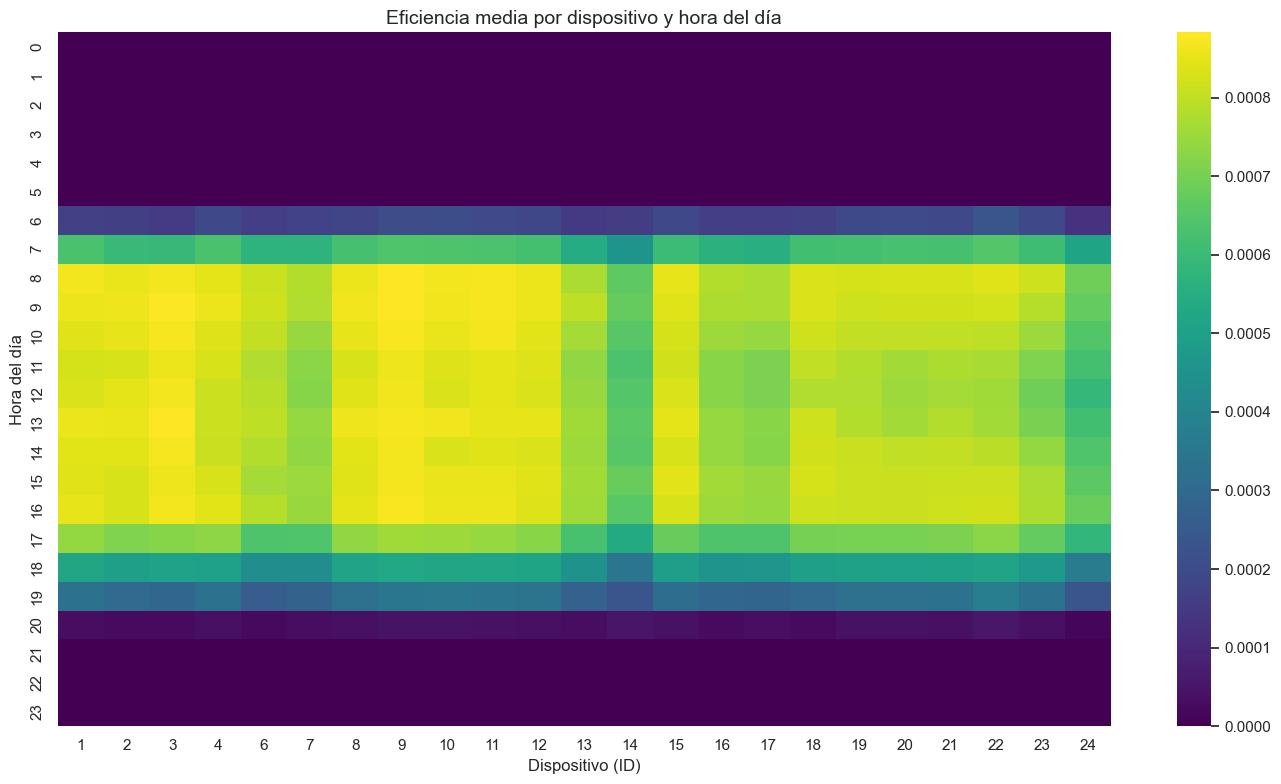


2. Cubo OLAP: Impacto ambiental sobre el rendimiento de inversores

Distribución de las variables discretizadas:
Temperatura:
temp_bin
Baja          73025
Media-Alta    72772
Media-Baja    72611
Alta          72404
Name: count, dtype: int64

Irradiancia:
irradiance_bin
Nula/Muy Baja    143566
Baja              76958
Media             47288
Alta              23000
Name: count, dtype: int64

Velocidad del viento:
wind_bin
Baja          78637
Media-Alta    72013
Alta          70748
Media-Baja    69414
Name: count, dtype: int64

Cubo OLAP de impacto ambiental:


dc_current                                            \
                        mean                                             
irradiance_bin Nula/Muy Baja                                      Baja   
temp_bin                Baja Media-Baja Media-Alta      Alta      Baja   
device                                                                   
1                   0.000270   0.000387   0.000412  0.000668  4.090640   
2                   0.001562   0.002263   0.003005  0.007954  4.386591   
3                   0.002838   0.004188   0.005738  0.015895  4.462754   
4                   0.000408   0.000570   0.000910  0.001689  4.918002   
6                   0.003946   0.006003   0.007910  0.018758  5.011996   

                                                                      ...  \
                                                                      ...   
irradiance_bin                                      Media             ...   
temp_bin       Media-Baja Media-Alta      Alta       Baja Media-Baja  ...   
device                                                                ...   
1                5.155222   6.451528  7.481796  16.824000  21.505519  ...   
2                5.368178   6.669799  7.750975  16.580037  21.855334  ...   
3                5.591229   6.911035  7.724304  17.061722  22.352669  ...   
4                6.281288   7.796988  8.808278  19.922426  25.681997  ...   
6                6.467264   7.772482  8.087803  20.318852  25.741637  ...   

               env_impact                                                      \
                     mean                                                       
irradiance_bin       Baja               Media                                   
temp_bin       Media-Alta      Alta      Baja Media-Baja Media-Alta      Alta   
device                                                                          
1               -0.061589  0.163823  0.727554   0.913244   1.049165  1.286509   
2               -0.061589  0.163823  0.727554   0.913244   1.049165  1.286509   
3               -0.061589  0.163823  0.727554   0.913244   1.049165  1.286509   
4               -0.061589  0.163823  0.727554   0.913244   1.049165  1.286509   
6               -0.061589  0.163823  0.727554   0.913244   1.049165  1.286509   

                                                          
                                                          
irradiance_bin      Alta                                  
temp_bin            Baja Media-Baja Media-Alta      Alta  
device                                                    
1               1.176112   1.613943   1.748325  1.850239  
2               1.176112   1.613943   1.748325  1.850239  
3               1.176112   1.613943   1.748325  1.850239  
4               1.176112   1.613943   1.748325  1.850239  
6               1.176112   1.613943   1.748325  1.850239  

[5 rows x 63 columns]

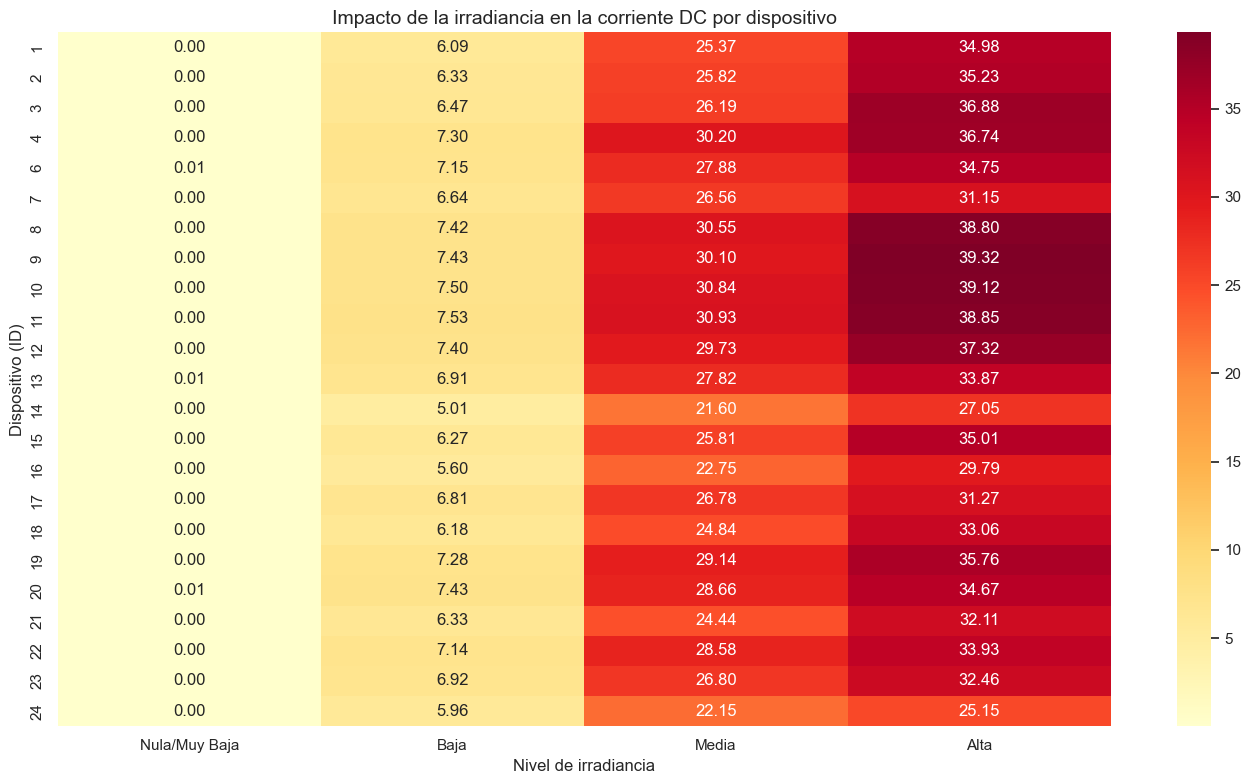


Cubos OLAP generados y guardados correctamente.


In [22]:
## 5. Generación de cubos OLAP

print("Generando cubos OLAP...")

# Preparar los datos para los cubos OLAP
olap_data = merged_df.copy()

# 1. Cubo OLAP para eficiencia y estabilidad DC por device, hora y fecha
print("\n1. Cubo OLAP: Eficiencia y estabilidad DC por device, hora y fecha")

# Crear el cubo OLAP utilizando pivot_table
efficiency_stability_cube = pd.pivot_table(
    olap_data,
    values=['efficiency', 'stability_dc_voltage', 'stability_dc_current'],
    index=['device'],
    columns=['hour'],
    aggfunc={
        'efficiency': ['mean', 'std', 'min', 'max'],
        'stability_dc_voltage': ['mean'],
        'stability_dc_current': ['mean']
    }
)

# Mostrar el cubo
print("\nCubo OLAP de eficiencia y estabilidad DC:")
display(efficiency_stability_cube.head())

# Visualización del cubo: Eficiencia media por dispositivo y hora
plt.figure(figsize=(14, 8))
efficiency_by_hour_device = pd.pivot_table(
    olap_data,
    values='efficiency',
    index='hour',
    columns='device',
    aggfunc='mean'
)
sns.heatmap(efficiency_by_hour_device, annot=False, cmap='viridis')
plt.title('Eficiencia media por dispositivo y hora del día')
plt.xlabel('Dispositivo (ID)')
plt.ylabel('Hora del día')
plt.tight_layout()
plt.show()

# 2. Cubo OLAP para impacto ambiental sobre el rendimiento de cada inversor
print("\n2. Cubo OLAP: Impacto ambiental sobre el rendimiento de inversores")

# Discretizar variables ambientales para facilitar el análisis
# Para temperatura ambiente
try:
    olap_data['temp_bin'] = pd.qcut(olap_data['ambient_temperature_o_149575'], 4, 
                                labels=['Baja', 'Media-Baja', 'Media-Alta', 'Alta'],
                                duplicates='drop')
except ValueError:
    # Si hay valores duplicados, usar cut con bins personalizados
    temp_min = olap_data['ambient_temperature_o_149575'].min()
    temp_max = olap_data['ambient_temperature_o_149575'].max()
    temp_bins = np.linspace(temp_min, temp_max, 5)  # 5 bordes para 4 intervalos
    olap_data['temp_bin'] = pd.cut(olap_data['ambient_temperature_o_149575'], 
                                bins=temp_bins,
                                labels=['Baja', 'Media-Baja', 'Media-Alta', 'Alta'],
                                include_lowest=True)

# Para irradiancia solar (que probablemente tiene muchos valores cero)
# Usar cut en lugar de qcut para evitar problemas con valores duplicados
irr_min = olap_data['poa_irradiance_o_149574'].min()
irr_max = olap_data['poa_irradiance_o_149574'].max()

# Crear bins personalizados para manejar mejor la distribución de irradiancia
# (que suele tener muchos ceros durante la noche)
irr_bins = [irr_min, 1, irr_max*0.33, irr_max*0.66, irr_max] 
olap_data['irradiance_bin'] = pd.cut(olap_data['poa_irradiance_o_149574'], 
                                bins=irr_bins,
                                labels=['Nula/Muy Baja', 'Baja', 'Media', 'Alta'],
                                include_lowest=True)

# Para velocidad del viento
try:
    olap_data['wind_bin'] = pd.qcut(olap_data['wind_speed_o_149576'], 4, 
                                labels=['Baja', 'Media-Baja', 'Media-Alta', 'Alta'],
                                duplicates='drop')
except ValueError:
    # Si hay valores duplicados, usar cut con bins personalizados
    wind_min = olap_data['wind_speed_o_149576'].min()
    wind_max = olap_data['wind_speed_o_149576'].max()
    wind_bins = np.linspace(wind_min, wind_max, 5)  # 5 bordes para 4 intervalos
    olap_data['wind_bin'] = pd.cut(olap_data['wind_speed_o_149576'], 
                                bins=wind_bins,
                                labels=['Baja', 'Media-Baja', 'Media-Alta', 'Alta'],
                                include_lowest=True)

# Mostrar la distribución de las variables discretizadas
print("\nDistribución de las variables discretizadas:")
print("Temperatura:")
print(olap_data['temp_bin'].value_counts())
print("\nIrradiancia:")
print(olap_data['irradiance_bin'].value_counts())
print("\nVelocidad del viento:")
print(olap_data['wind_bin'].value_counts())

# Crear el cubo OLAP para impacto ambiental
env_impact_cube = pd.pivot_table(
    olap_data,
    values=['dc_current', 'efficiency', 'env_impact'],
    index=['device'],
    columns=['irradiance_bin', 'temp_bin'],
    aggfunc={
        'dc_current': ['mean', 'std'],
        'efficiency': ['mean'],
        'env_impact': ['mean']
    }
)

# Mostrar el cubo
print("\nCubo OLAP de impacto ambiental:")
display(env_impact_cube.head())

# Visualización del impacto de la irradiancia en la corriente DC por dispositivo
plt.figure(figsize=(14, 8))
dc_current_by_irradiance = pd.pivot_table(
    olap_data,
    values='dc_current',
    index='device',
    columns='irradiance_bin',
    aggfunc='mean'
)
sns.heatmap(dc_current_by_irradiance, annot=True, cmap='YlOrRd', fmt='.2f')
plt.title('Impacto de la irradiancia en la corriente DC por dispositivo')
plt.xlabel('Nivel de irradiancia')
plt.ylabel('Dispositivo (ID)')
plt.tight_layout()
plt.show()

# Guardar los cubos OLAP para uso posterior si es necesario
efficiency_stability_cube.to_csv('efficiency_stability_cube.csv')
env_impact_cube.to_csv('env_impact_cube.csv')

print("\nCubos OLAP generados y guardados correctamente.")

Tomando una muestra de 5000 filas de 290812 para acelerar el análisis...
Normalizando datos...
Datos preparados: 5000 filas, 13 columnas

1. Entrenando modelo Isolation Forest...


2. Aplicando DBSCAN (más rápido que One-Class SVM)...
3. Aplicando Local Outlier Factor...

Total de anomalías detectadas: 381 (7.62%)

Distribución de anomalías por dispositivo:
3. Aplicando Local Outlier Factor...

Total de anomalías detectadas: 381 (7.62%)

Distribución de anomalías por dispositivo:


device
14    85
24    77
3     20
17    19
9     18
7     15
13    14
16    13
11    12
2     10
21    10
23     9
22     9
4      9
6      9
12     9
19     8
15     7
1      6
8      6
10     6
20     5
18     5
Name: is_anomaly, dtype: int64

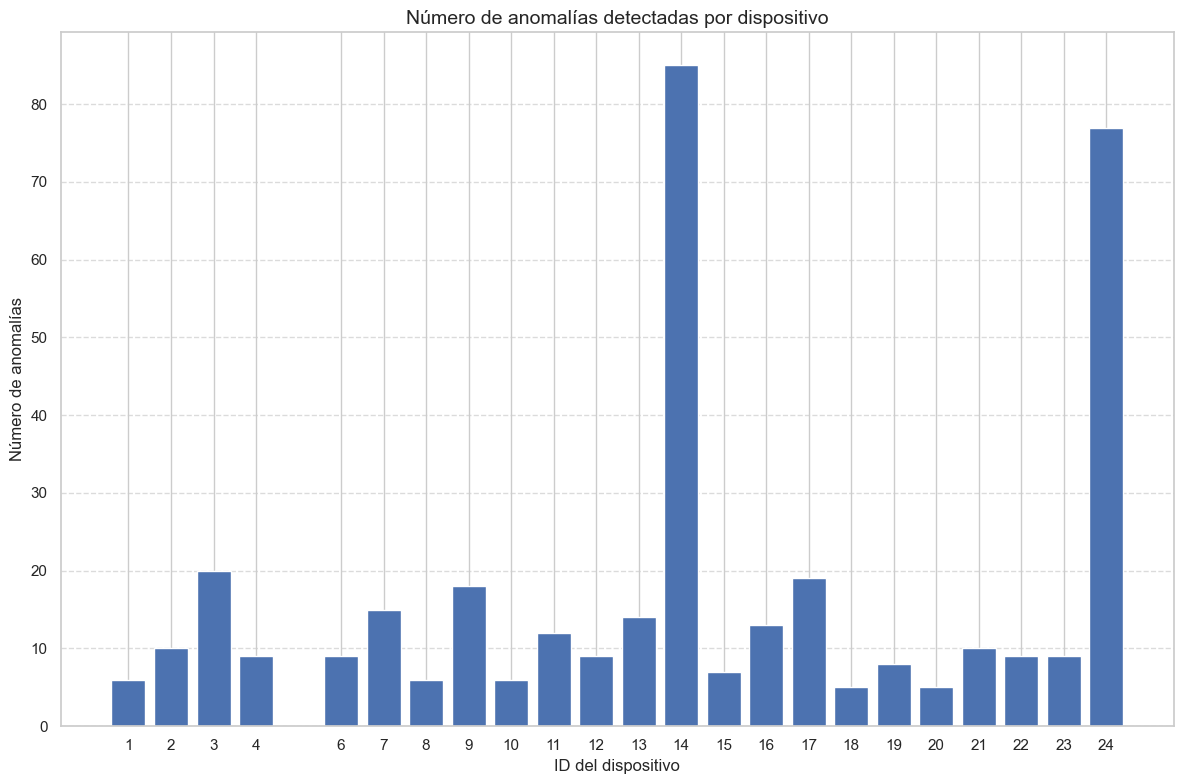

In [23]:
# Seleccionar características relevantes para la detección de anomalías
features = [
    'dc_current', 'dc_voltage', 'ac_current', 'ac_voltage', 'ac_power',
    'ambient_temperature_o_149575', 'wind_speed_o_149576', 'poa_irradiance_o_149574',
    'efficiency', 'stability_dc_voltage', 'stability_dc_current', 'env_impact'
]

# Filtrar datos para tener solo filas con valores válidos
anomaly_data_full = merged_df.dropna(subset=features).copy()

# Tomar una muestra pequeña pero representativa (5000 filas)
print(f"Tomando una muestra de 5000 filas de {len(anomaly_data_full)} para acelerar el análisis...")
anomaly_data = anomaly_data_full.sample(n=5000, random_state=42)

# Normalizar los datos
print("Normalizando datos...")
scaler = StandardScaler()
anomaly_data_scaled = scaler.fit_transform(anomaly_data[features])

# Crear un DataFrame con los datos escalados y mantener el mismo índice que anomaly_data
anomaly_df = pd.DataFrame(anomaly_data_scaled, columns=features, index=anomaly_data.index)

# Añadir la columna device para análisis posterior
anomaly_df['device'] = anomaly_data['device'].values

print(f"Datos preparados: {anomaly_df.shape[0]} filas, {anomaly_df.shape[1]} columnas")

# 1. Modelo Isolation Forest (más rápido y eficiente para grandes conjuntos de datos)
print("\n1. Entrenando modelo Isolation Forest...")
iso_forest = IsolationForest(
    n_estimators=100,
    contamination=0.05,  # Asumimos que aproximadamente el 5% de los datos son anomalías
    random_state=42,
    n_jobs=-1  # Usar todos los núcleos disponibles para acelerar
)

# Entrenar el modelo
iso_forest.fit(anomaly_data_scaled)

# Predecir anomalías
anomaly_df['anomaly_iforest'] = iso_forest.predict(anomaly_data_scaled)
# Convertir a formato binario (1: normal, 0: anomalía)
anomaly_df['anomaly_iforest'] = anomaly_df['anomaly_iforest'].map({1: 0, -1: 1})

# 2. Usamos DBSCAN en lugar de One-Class SVM (mucho más rápido)
print("2. Aplicando DBSCAN (más rápido que One-Class SVM)...")
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(anomaly_data_scaled)

# En DBSCAN, -1 son outliers (anomalías)
anomaly_df['anomaly_dbscan'] = (dbscan_labels == -1).astype(int)

# 3. Modelo Local Outlier Factor (LOF) con menos vecinos para acelerar
print("3. Aplicando Local Outlier Factor...")
lof = LocalOutlierFactor(
    n_neighbors=10,  # Menos vecinos = más rápido
    contamination=0.05,
    n_jobs=-1  # Usar todos los núcleos disponibles
)

# Predecir anomalías (LOF es un detector de anomalías no supervisado)
anomaly_df['anomaly_lof'] = lof.fit_predict(anomaly_data_scaled)
# Convertir a formato binario (1: normal, 0: anomalía)
anomaly_df['anomaly_lof'] = anomaly_df['anomaly_lof'].map({1: 0, -1: 1})

# Combinar resultados de los tres modelos
anomaly_df['anomaly_score'] = anomaly_df['anomaly_iforest'] + anomaly_df['anomaly_dbscan'] + anomaly_df['anomaly_lof']
# Una puntuación de 2 o más significa que al menos 2 de los 3 modelos detectaron una anomalía
anomaly_df['is_anomaly'] = (anomaly_df['anomaly_score'] >= 2).astype(int)

# Añadir la columna is_anomaly al dataset original
anomaly_data['is_anomaly'] = anomaly_df['is_anomaly']

# Mostrar el número de anomalías detectadas
total_anomalies = anomaly_df['is_anomaly'].sum()
print(f"\nTotal de anomalías detectadas: {total_anomalies} ({total_anomalies / len(anomaly_df) * 100:.2f}%)")

# Mostrar la distribución de anomalías por dispositivo
anomalies_by_device = anomaly_data.groupby('device')['is_anomaly'].sum().sort_values(ascending=False)
print("\nDistribución de anomalías por dispositivo:")
display(anomalies_by_device)

# Visualización de anomalías
plt.figure(figsize=(12, 8))
plt.bar(anomalies_by_device.index, anomalies_by_device.values)
plt.title('Número de anomalías detectadas por dispositivo')
plt.xlabel('ID del dispositivo')
plt.ylabel('Número de anomalías')
plt.xticks(anomalies_by_device.index)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Aplicando estrategias de validación para el modelo no supervisado...

1. Visualización mediante reducción de dimensionalidad
Aplicando PCA...


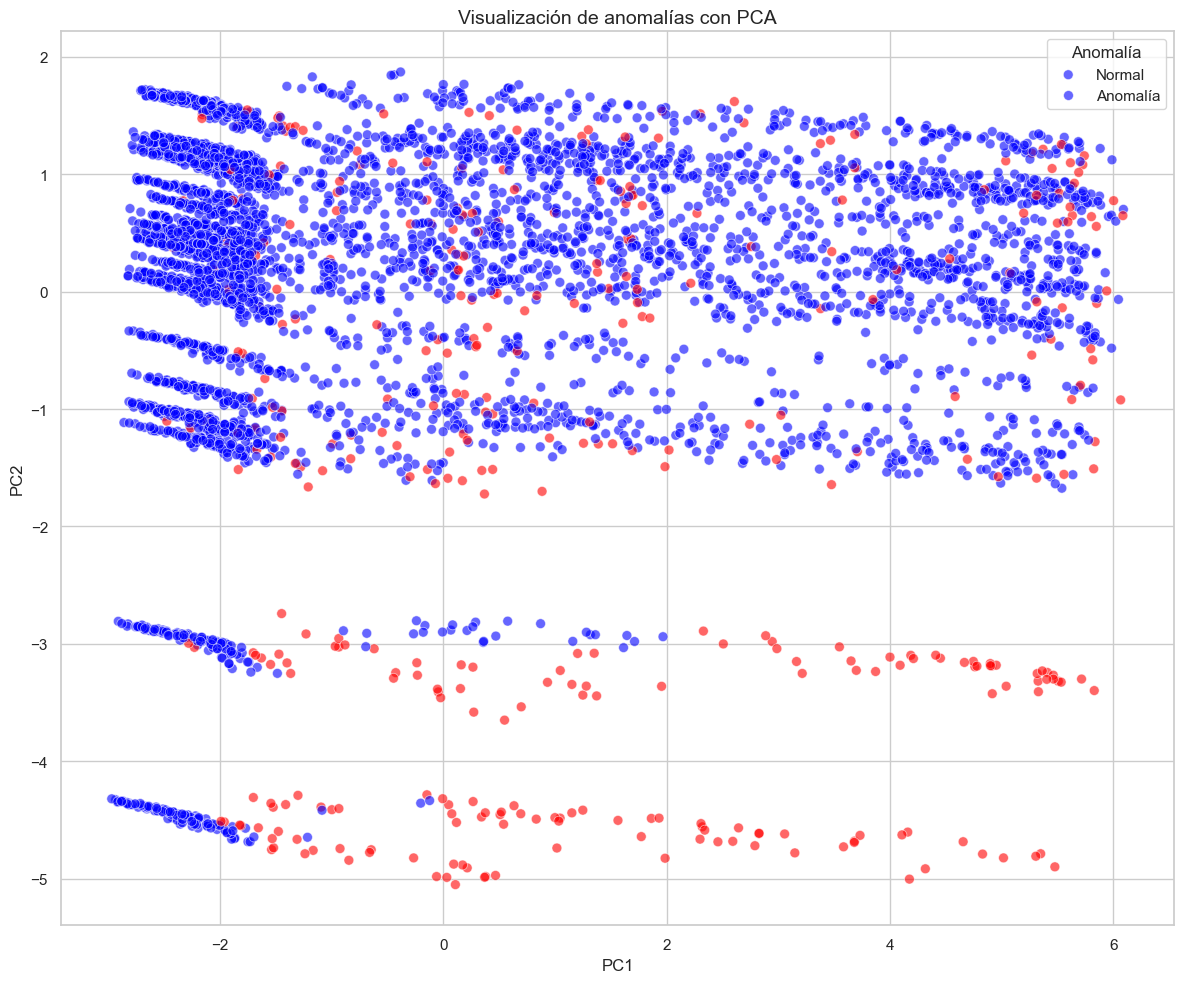

Aplicando t-SNE...


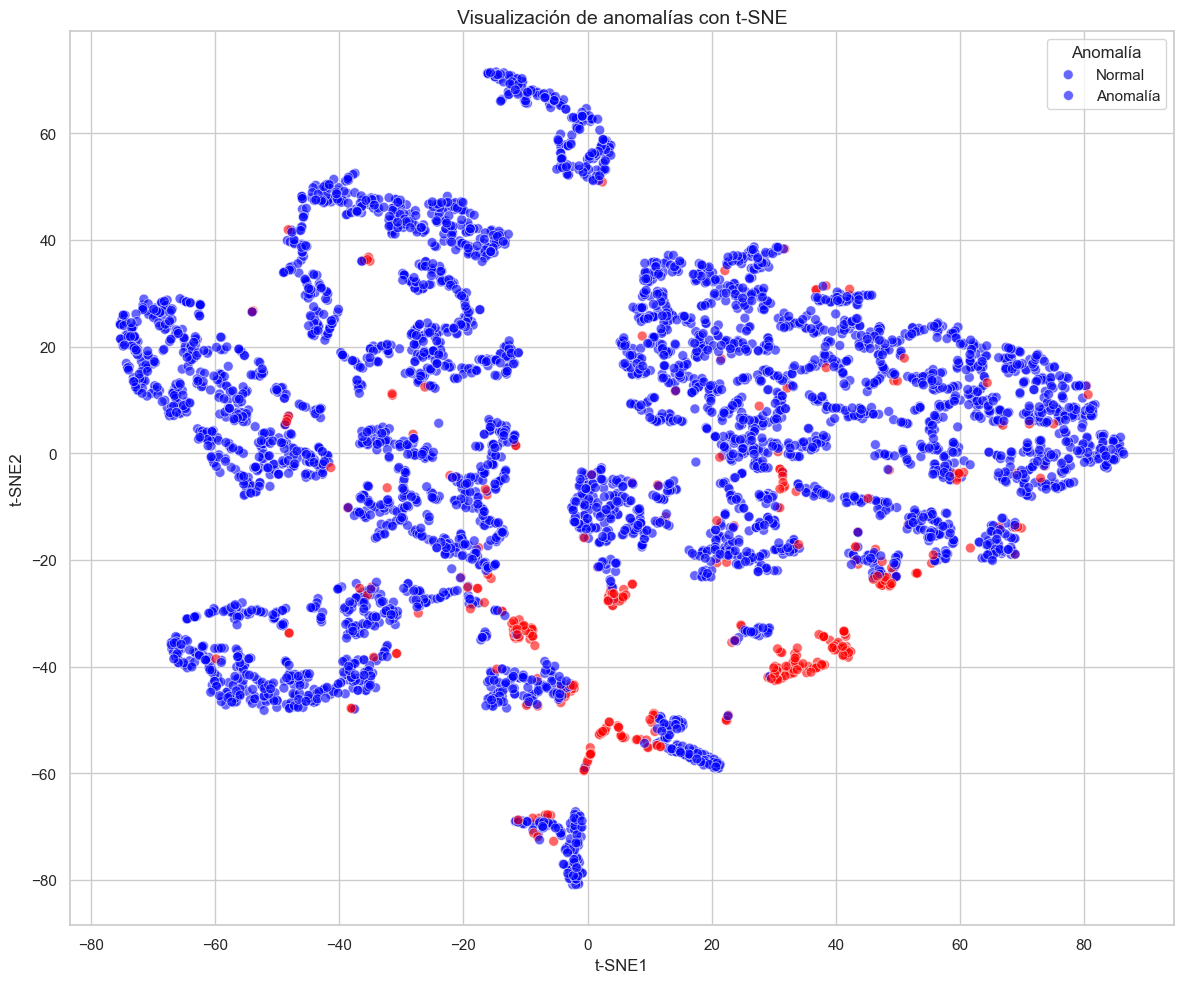


2. Validación con reglas físicas
Anomalías validadas por reglas físicas: 0 de 381 (0.00%)

Ejemplos de anomalías validadas por reglas físicas:


,measured_on,device,dc_current,dc_voltage,ac_current,ac_voltage,ac_power,ambient_temperature_o_149575,wind_speed_o_149576,wind_direction_o_149577,...,dayofweek,efficiency,stability_dc_voltage,stability_dc_current,env_impact,is_anomaly,rule_impossible_efficiency,rule_ac_without_dc,rule_high_irr_low_current,rules_anomaly



3. Análisis de anomalías en condiciones ambientales normales
Anomalías en condiciones ambientales normales: 26 de 1006 (2.58%)

Ejemplos de anomalías en condiciones ambientales normales:


,measured_on,device,dc_current,dc_voltage,ac_current,ac_voltage,ac_power,ambient_temperature_o_149575,wind_speed_o_149576,wind_direction_o_149577,...,dayofweek,efficiency,stability_dc_voltage,stability_dc_current,env_impact,is_anomaly,rule_impossible_efficiency,rule_ac_without_dc,rule_high_irr_low_current,rules_anomaly
162237,2018-05-20 06:00:00,14,0.321,515.117,0.947,274.797,0.000,54.8,4.5,138.0,...,6,0.000000,-0.365474,-0.913323,-0.552749,1,0,0,0,0
165971,2018-02-02 08:00:00,15,2.986,521.882,1.707,283.882,1.564,53.2,4.1,305.0,...,4,0.001004,-0.062962,-0.634662,-0.308078,1,0,0,0,0
63349,2017-12-05 16:15:00,7,0.000,0.000,0.000,0.000,0.000,61.3,7.1,339.0,...,1,0.000000,-0.176661,-0.728894,-0.051898,1,0,0,0,0
162541,2018-05-23 10:00:00,14,16.493,715.811,13.608,287.090,11.598,65.6,4.4,120.0,...,2,0.000982,-0.365474,-0.913323,0.251811,1,0,0,0,0
51059,2017-12-19 13:15:00,6,0.000,0.000,0.000,0.000,0.000,52.8,7.8,134.0,...,1,0.000000,-0.108652,-0.649032,-0.119519,1,0,0,0,0


In [24]:
## 7. Estrategia de validación

print("Aplicando estrategias de validación para el modelo no supervisado...")

# 1. Visualización mediante reducción de dimensionalidad
print("\n1. Visualización mediante reducción de dimensionalidad")

# PCA para reducir a 2 dimensiones
print("Aplicando PCA...")
pca = PCA(n_components=2)
pca_result = pca.fit_transform(anomaly_data_scaled)

# Crear un DataFrame con los resultados de PCA
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['is_anomaly'] = anomaly_df['is_anomaly'].values
pca_df['device'] = anomaly_data['device'].values

# Visualizar PCA
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x='PC1', y='PC2',
    hue='is_anomaly',
    palette={0: 'blue', 1: 'red'},
    data=pca_df,
    alpha=0.6,
    s=50
)
plt.title('Visualización de anomalías con PCA')
plt.legend(title='Anomalía', labels=['Normal', 'Anomalía'])
plt.tight_layout()
plt.show()

# t-SNE para visualización no lineal
print("Aplicando t-SNE...")
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(anomaly_data_scaled)

# Crear un DataFrame con los resultados de t-SNE
tsne_df = pd.DataFrame(data=tsne_result, columns=['t-SNE1', 't-SNE2'])
tsne_df['is_anomaly'] = anomaly_df['is_anomaly'].values
tsne_df['device'] = anomaly_data['device'].values

# Visualizar t-SNE
plt.figure(figsize=(12, 10))
sns.scatterplot(
    x='t-SNE1', y='t-SNE2',
    hue='is_anomaly',
    palette={0: 'blue', 1: 'red'},
    data=tsne_df,
    alpha=0.6,
    s=50
)
plt.title('Visualización de anomalías con t-SNE')
plt.legend(title='Anomalía', labels=['Normal', 'Anomalía'])
plt.tight_layout()
plt.show()

# 2. Validación con reglas físicas
print("\n2. Validación con reglas físicas")

# Añadir las columnas originales al dataframe de anomalías para validación
validation_df = anomaly_data.copy()

# Regla 1: Eficiencia imposible (> 1.0)
validation_df['rule_impossible_efficiency'] = (validation_df['efficiency'] > 1.0).astype(int)

# Regla 2: Potencia AC sin corriente DC
validation_df['rule_ac_without_dc'] = ((validation_df['ac_power'] > 0) & 
                                    (validation_df['dc_current'] <= 0)).astype(int)

# Regla 3: Alta irradiancia pero baja corriente DC
validation_df['rule_high_irr_low_current'] = ((validation_df['poa_irradiance_o_149574'] > validation_df['poa_irradiance_o_149574'].quantile(0.75)) & 
                                    (validation_df['dc_current'] < validation_df['dc_current'].quantile(0.25))).astype(int)

# Combinar las reglas
validation_df['rules_anomaly'] = ((validation_df['rule_impossible_efficiency'] | 
                                validation_df['rule_ac_without_dc'] | 
                                validation_df['rule_high_irr_low_current']) & 
                            (validation_df['is_anomaly'] == 1)).astype(int)

# Calcular la coincidencia entre las reglas físicas y las anomalías detectadas
rules_match = (validation_df['rules_anomaly'] == 1).sum()
total_anomalies = (validation_df['is_anomaly'] == 1).sum()

if total_anomalies > 0:
    print(f"Anomalías validadas por reglas físicas: {rules_match} de {total_anomalies} ({rules_match/total_anomalies*100:.2f}%)")
else:
    print(f"Anomalías validadas por reglas físicas: {rules_match} de {total_anomalies} (N/A - No se detectaron anomalías)")

# Mostrar ejemplos de anomalías validadas por reglas físicas
print("\nEjemplos de anomalías validadas por reglas físicas:")
display(validation_df[validation_df['rules_anomaly'] == 1].head())

# 3. Análisis de anomalías en condiciones ambientales normales
print("\n3. Análisis de anomalías en condiciones ambientales normales")

# Definir condiciones ambientales normales (entre percentiles 25 y 75)
normal_conditions = (
    (validation_df['ambient_temperature_o_149575'] >= validation_df['ambient_temperature_o_149575'].quantile(0.25)) &
    (validation_df['ambient_temperature_o_149575'] <= validation_df['ambient_temperature_o_149575'].quantile(0.75)) &
    (validation_df['poa_irradiance_o_149574'] >= validation_df['poa_irradiance_o_149574'].quantile(0.25)) &
    (validation_df['poa_irradiance_o_149574'] <= validation_df['poa_irradiance_o_149574'].quantile(0.75)) &
    (validation_df['wind_speed_o_149576'] >= validation_df['wind_speed_o_149576'].quantile(0.25)) &
    (validation_df['wind_speed_o_149576'] <= validation_df['wind_speed_o_149576'].quantile(0.75))
)

# Contar anomalías en condiciones normales
normal_anomalies = (validation_df['is_anomaly'] & normal_conditions).sum()
normal_total = normal_conditions.sum()

if normal_total > 0:
    print(f"Anomalías en condiciones ambientales normales: {normal_anomalies} de {normal_total} ({normal_anomalies/normal_total*100:.2f}%)")
else:
    print(f"Anomalías en condiciones ambientales normales: {normal_anomalies} de {normal_total} (N/A - No hay datos en condiciones normales)")

# Mostrar ejemplos de anomalías en condiciones normales
print("\nEjemplos de anomalías en condiciones ambientales normales:")
display(validation_df[(validation_df['is_anomaly'] == 1) & normal_conditions].head())

# Guardar resultados de anomalías para análisis posterior
validation_df.to_csv('anomalies_validation.csv', index=False)

In [25]:
merged_df.to_csv('dataset_final.csv', index=False)
print("\nDataset final guardado como 'dataset_final.csv'")
print("Análisis completado con éxito.")


Dataset final guardado como 'dataset_final.csv'
Análisis completado con éxito.
